# Explore here

In [4]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Importar dataset
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Guardar mi dataset en un csv para trabajo futuro
data.to_csv("../data/raw/data.csv", index=False)

In [8]:
# Tamaño de mis datos
data.shape

(1338, 7)

In [9]:
# Informacion general de mis datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**INFORMACIÓN GENERAL DE MIS DATOS**

Mi dataset se conforma de 1338 datos dsitribuidos en 7 columnas, no presenta valores faltantes en ninguna de ellas y observamos 4 variables numéricas y 3 categóricas (`sex`, `smoker` y `region`)

In [16]:
# Búsqueda de duplicados
display(data[data.duplicated(keep=False)])

data = data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges


In [23]:
# Selección de atributos relevantes
data["region"].value_counts()
# Por ahora mantendré los valores de "region" hasta el análisis de correlaciones, el resto se mantiene igualmente 

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [27]:
# ANÁLISIS DE VARIABLES CATEGÓRICAS
# ["sex", "smoker", "region"]
display(data["sex"].value_counts())
display(data["smoker"].value_counts())
display(data["region"].value_counts())

sex
male      675
female    662
Name: count, dtype: int64

smoker
no     1063
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

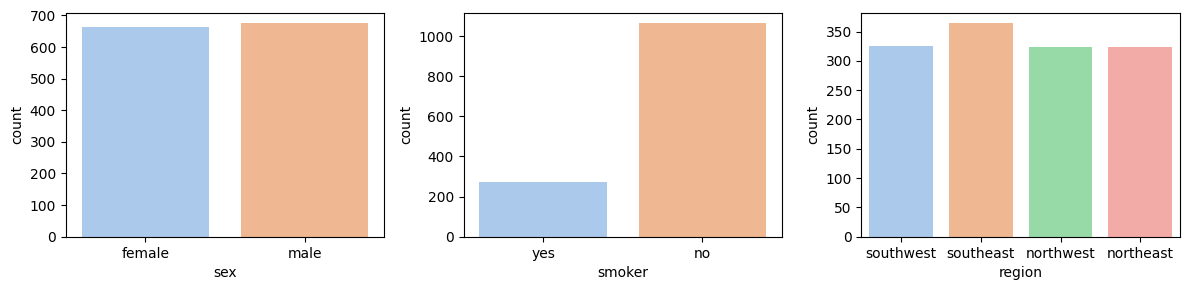

In [38]:
fig, axis = plt.subplots(1, 3, figsize = (12, 3))

sns.countplot(ax = axis[0], data = data, x = "sex", palette='pastel', hue= "sex", legend=False)
sns.countplot(ax = axis[1], data = data, x = "smoker", palette='pastel', hue= "smoker", legend=False)
sns.countplot(ax = axis[2], data = data, x = "region", palette='pastel', hue= "region", legend=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

**ANÁLSIS GRÁFICO DE VARIABLES CATEGÓRICAS**

- `sex` : Variable distribuida en dos categorías: "female" y "male", prácticamente con igual cantidad de datos repartidos en ellas.
- `smoker` : Variable distribuida en dos categorías: "yes" y "no", con gran predominio de no fumadores (relación aprox. 4:1).
- `region` : Variable distribuida en 4 categorías con prácticamente igual representación entre ellas, solo predomina por muy poco "southeast".

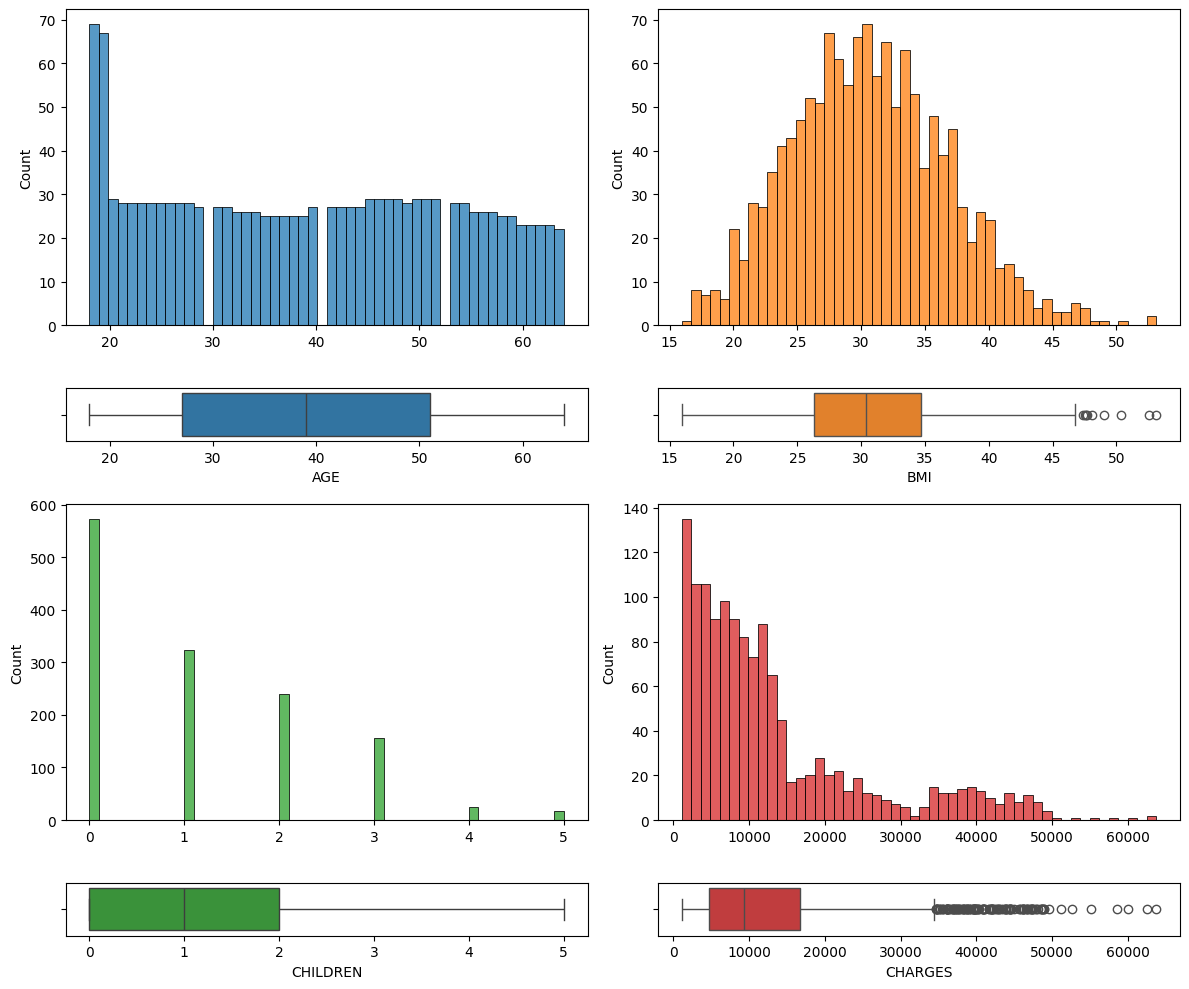

In [46]:
# ANÁLISIS DE VARIABLES NUMÉRICAS
# ["age", "bmi", "children", "charges"]
fig, axis = plt.subplots(4, 2, figsize = (12, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# age
sns.histplot(ax = axis[0, 0], data = data, x = "age", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "age", color="#1f77b4").set(xlabel = "AGE")

# bmi
sns.histplot(ax = axis[0, 1], data = data, x = "bmi", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "bmi", color="#ff7f0e").set(xlabel = "BMI")

# children
sns.histplot(ax = axis[2, 0], data = data, x = "children", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "children", color="#2ca02c").set(xlabel = "CHILDREN")

# charges
sns.histplot(ax = axis[2, 1], data = data, x = "charges", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "charges", color="#d62728").set(xlabel = "CHARGES")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

**ANÁLISIS GRÁFICO DE VARIABLES NUMÉRICAS**

- `age` : Mayoría de los datos distribuidos entre edades de 30 a 50 años, destacándose un pico en menores de 20 años.
- `bmi` : Distribución semejante a la normal, mayoría de los datos entre 25 y 35, alrededor de la mediana de los datos. Presencia de algunos valores atípicos en cola a la derecha que pudieran representar personas con obesidad, lo cual sería normal en la muestra.
- `children`: Variable de tipo discreta con mayor representación entre 0 y 2 niños.
- `charges`: Distribución asimétrica con cola a la derecha y concentración de datos entre 0 y 20000, presencia de outliers que representarían primas de seguro muy altas, ya sea debido a errores de datos o condiciones de personas que eleven mucho el valor.

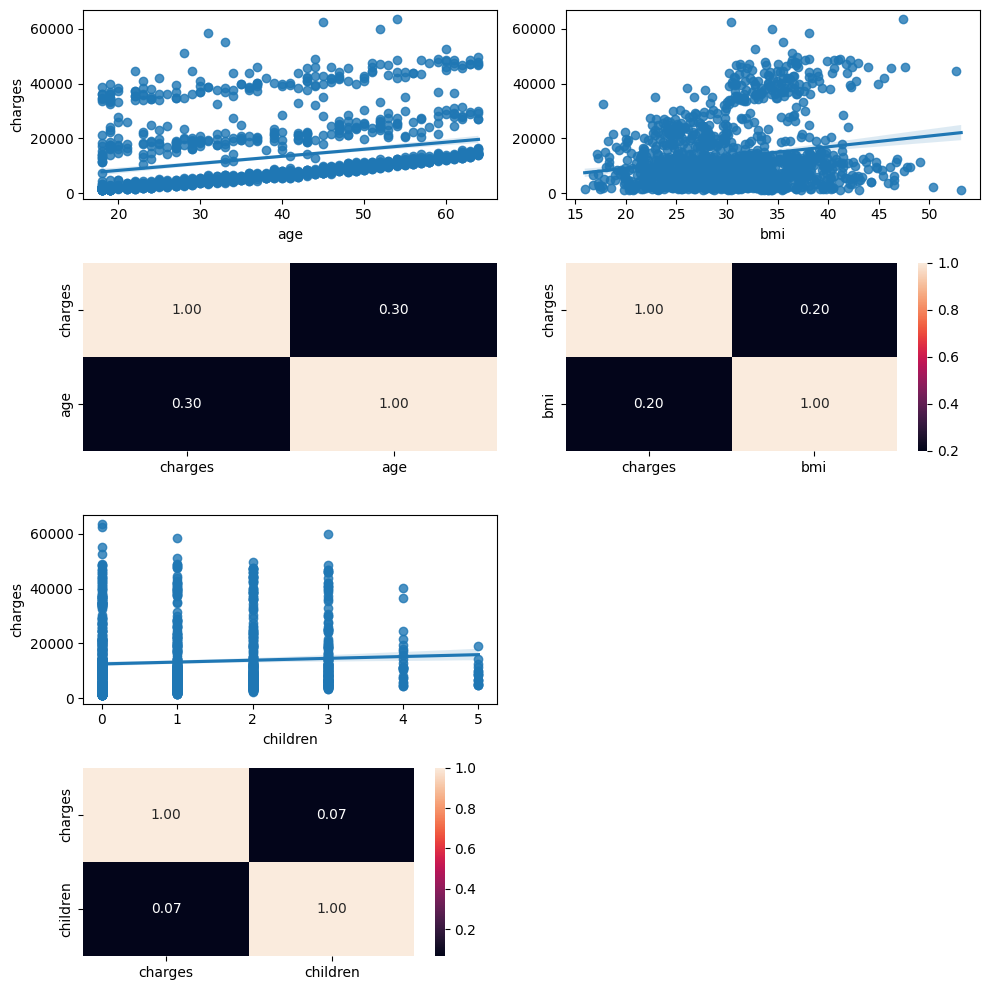

In [57]:
# ANÁLISIS NUMÉRICO - NUMÉRICO BUSCANDO CORRELACIONES ENTRE VARIABLES BUSCANDO RELACIÓN CON MI VARIABLE OBJETIVO "charges"
fig, axis = plt.subplots(4, 2, figsize = (10, 10))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data, x = "age", y = "charges")
sns.heatmap(data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data, x = "children", y = "charges")
sns.heatmap(data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

axis[2, 1].axis("off")
axis[3, 1].axis("off")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

**RESUMEN DE ANÁLISIS NUMÉRICO - NUMÉRICO**

Correlación leve entre las variables `age` y `bmi` con la variable target `charges`, indicando que al aumentar tanto la edad como el ñindice de masa corporal aumenta levemente con relación a ellos el precio de prima del seguro. La presencia de 1 o más hijos no parece modificar dicho precio.

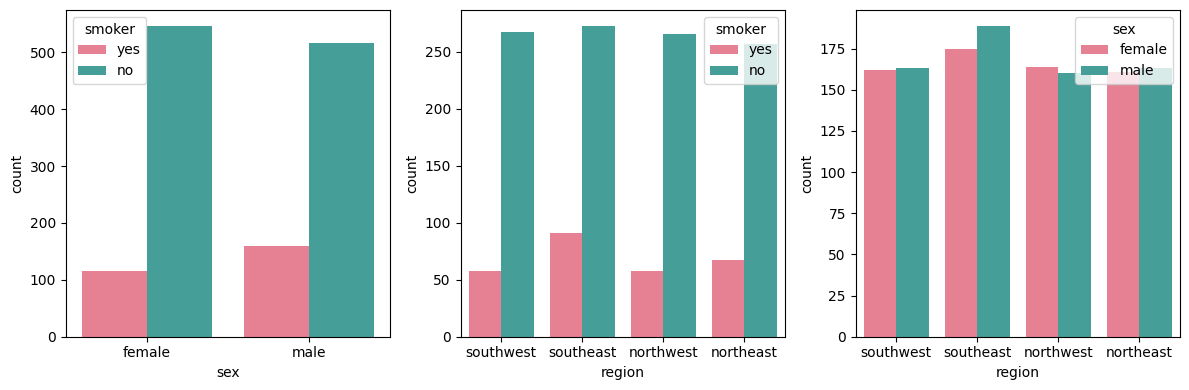

In [67]:
# ANÁLISIS CATEGÓRICO - CATEGÓRICO
# ["sex", "smoker", "region"]
fig, axis = plt.subplots(1, 3, figsize = (12, 4))

sns.countplot(ax = axis[0], data = data, x = "sex", palette='husl', hue= "smoker", legend=True)
sns.countplot(ax = axis[1], data = data, x = "region", palette='husl', hue= "smoker", legend=True)
sns.countplot(ax = axis[2], data = data, x = "region", palette='husl', hue= "sex", legend=True)



# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Bastante similar la distribucion de fumadores por sexo, fumadores por región y sexo por región que en la distribucion total.

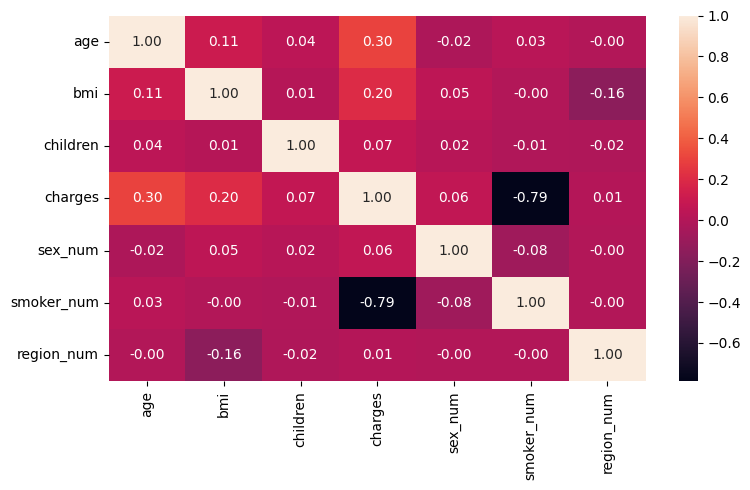

In [69]:
# ANÁLISIS NUMÉRICO - CATEGÓRICO COMPLETO
# Variables numéricas
# ["age", "bmi", "children", "charges"]
# Codificando las variables categóricas a números enteros para su procesamiento
# ["sex", "smoker", "region"]
data["sex_num"] = pd.factorize(data["sex"])[0]
data["smoker_num"] = pd.factorize(data["smoker"])[0]
data["region_num"] = pd.factorize(data["region"])[0]

fig, axis = plt.subplots(figsize = (8, 5))

sns.heatmap(data[["age", "bmi", "children", "charges", "sex_num", "smoker_num", "region_num"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

**CONCLUSIONES**

Del análisis de correlaciones entre todas las variables podemos identificar una fuerte relación entre `smoker` y la variable target `charges`, lo cual parece obedecer a la lógica de que personas fumadoras tendrán una prima de seguro médico más alta por esta condición. Se vuelve a evidenciar correlación leve entre `bmi` y `age` con `charges` y que la variable `region` no está prácticamente correlacionada con ninguna otra variable, siendo probable que se elimine del análisis y del posterior modelo.

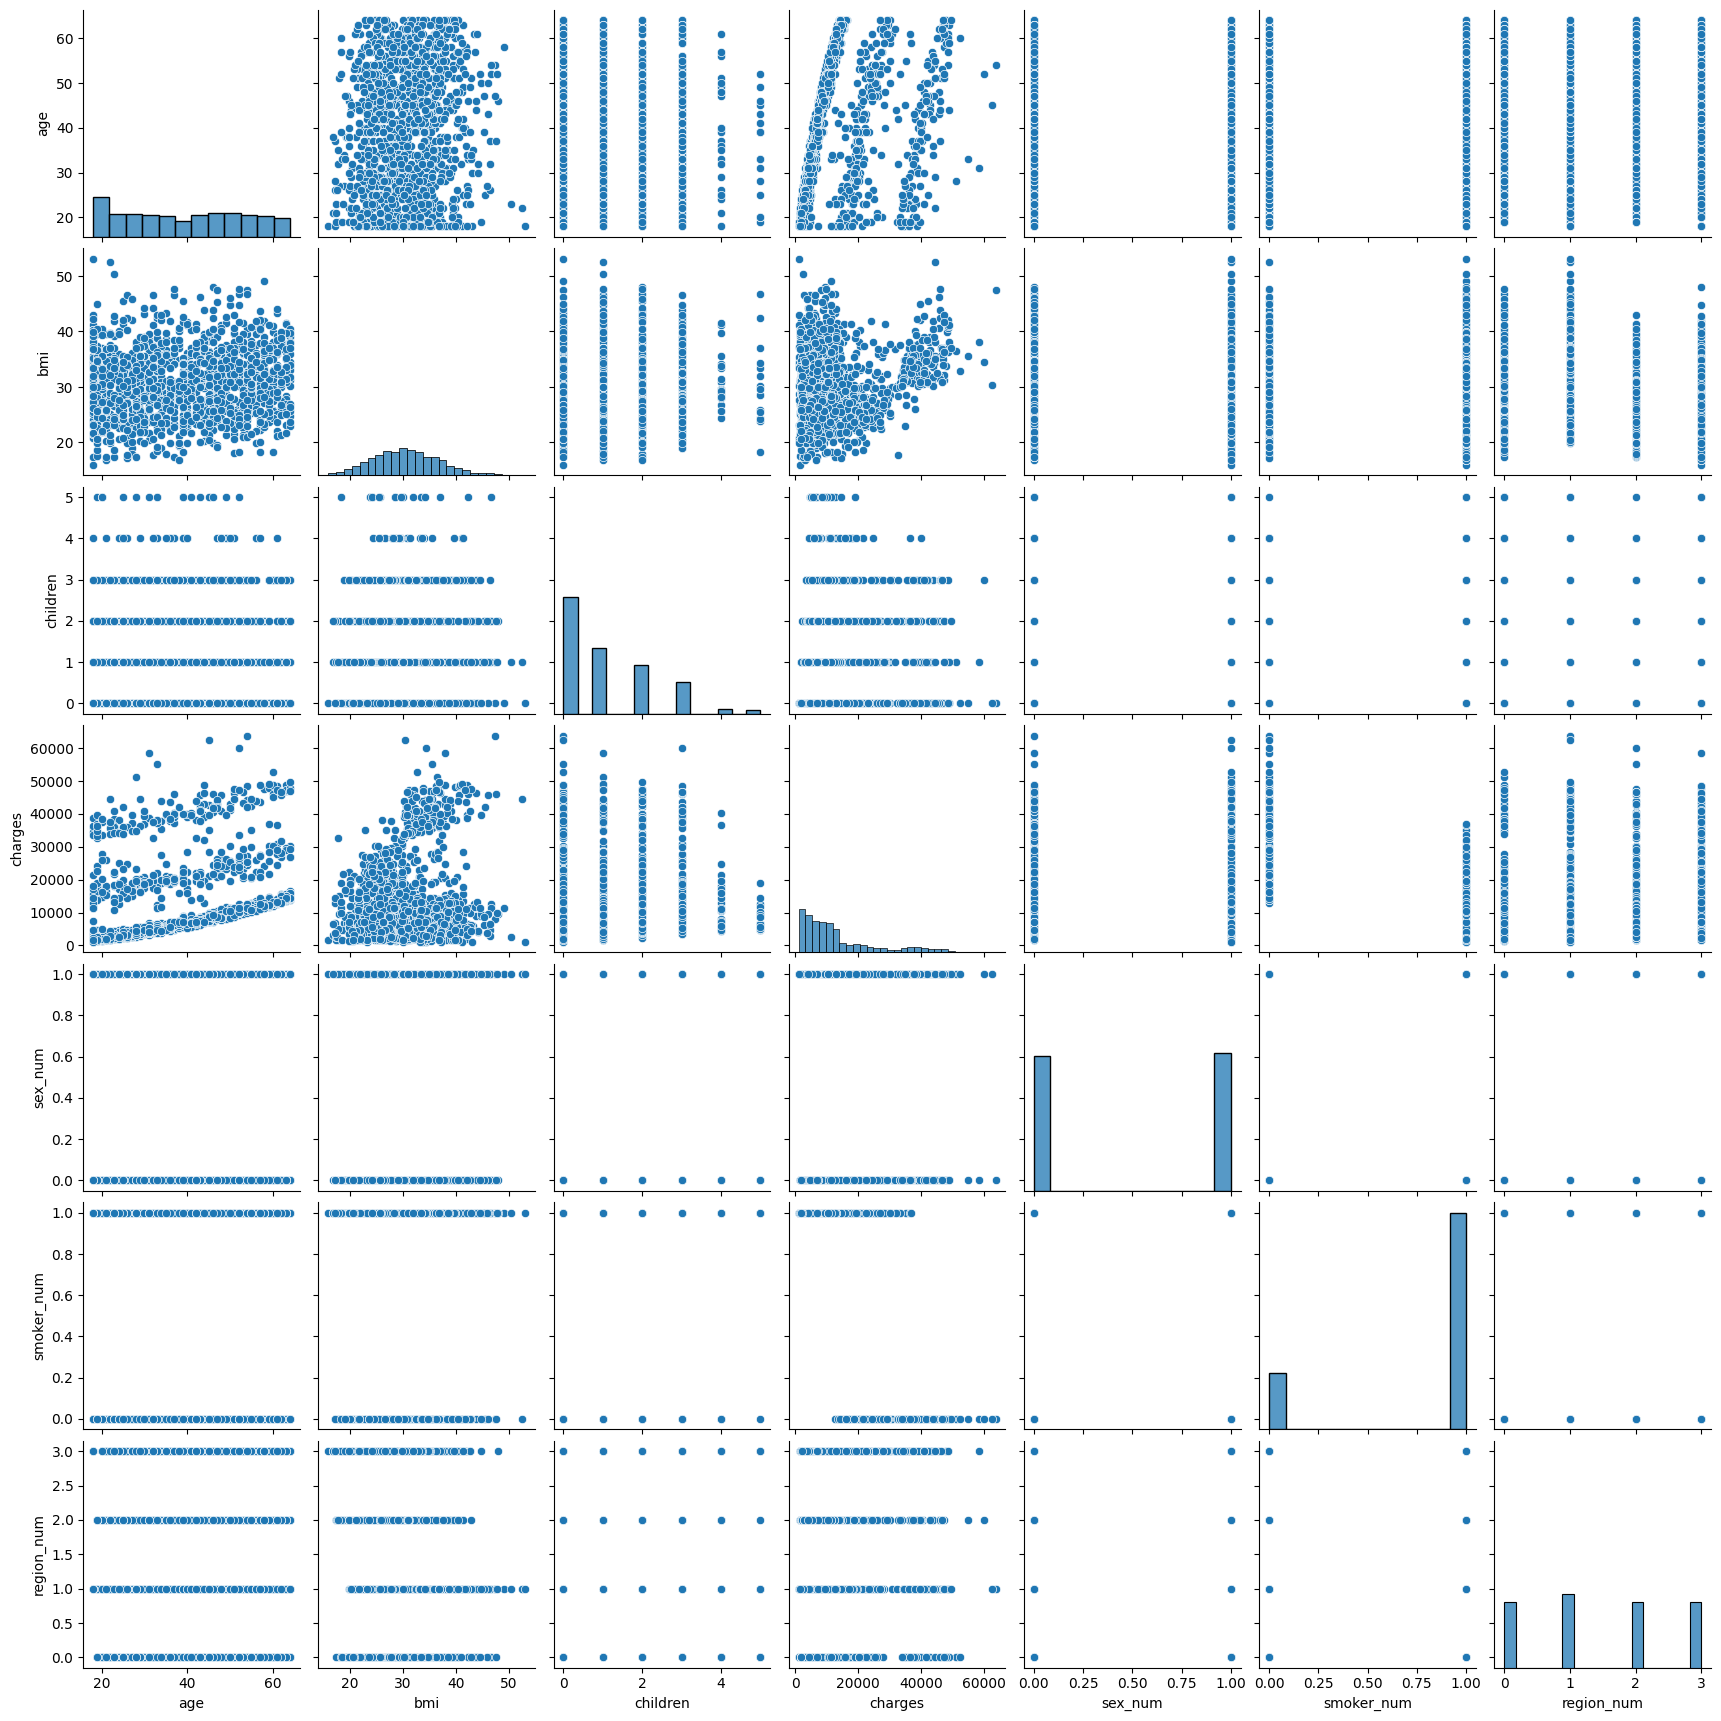

In [70]:
# RELACIONES TODOS CON TODOS
sns.pairplot(data = data)
plt.show()

In [71]:
# LIMPIEZA DE VALORES ATÍPICOS
